In [227]:
import random
import math
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [251]:
values = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
suits = ["S", "H", "C", "D"]
suitLogo = {"S": "♠", "H": "♥", "C": "♣", "D": "♦"}

In [3]:
def genTHCombinations():
    THCombinations = []
    for i1 in range(7):
        for i2 in range(i1 + 1, 7):
            for i3 in range(i2 + 1, 7):
                for i4 in range(i3 + 1, 7):
                    for i5 in range(i4 + 1, 7):
                        THCombinations.append([i1, i2, i3, i4, i5])
    return THCombinations
THCombinations = genTHCombinations()

In [4]:
def genPLOCombinations():
    PLOCombinations = []
    for i1 in range(5):
        for i2 in range(i1 + 1, 5):
            for i3 in range (i2 + 1, 5):
                for j1 in range(5, 9):
                    for j2 in range(j1 + 1, 9):
                        PLOCombinations.append([i1, i2, i3, j1, j2])
    return PLOCombinations
PLOCombinations = genPLOCombinations()

In [5]:
class Card:   
    def __init__(self, suit, value):
        self.suit = suit
        self.value = values.index(value) + 2
        
    def __eq__(self, anotherCard):
        return (self.suit == anotherCard.suit) and (self.value == anotherCard.value)
        
    def __str__(self):
        return f"{suitLogo[self.suit]}{values[self.value - 2]}"

In [6]:
class Hand:
    handTypes = {
        "straight flush": 8,
        "four of a kind": 7,
        "full house": 6,
        "flush": 5,
        "straight" : 4,
        "three of a kind": 3,
        "two pairs": 2,
        "one pair": 1,
        "other": 0
    }
    
    def __init__(self, cards):
        self.cards = cards
        self.orderHand()
        self.type, self.values = self.checkType()

    def orderHand(self):
        return self.cards.sort(key=lambda x: x.value, reverse=True)
    
    def checkFourOfAKind(self):
        if (self.cards[0].value == self.cards[1].value == self.cards[2].value == self.cards[3].value):
            return ("four of a kind", [self.cards[0].value])
        elif (self.cards[1].value == self.cards[2].value == self.cards[3].value == self.cards[4].value):
            return ("four of a kind", [self.cards[1].value])
        return False
    
    def checkFullHouse(self):
        if (self.cards[0].value == self.cards[1].value == self.cards[2].value) and (self.cards[3].value == self.cards[4].value):
            return ("full house", [self.cards[0].value, self.cards[3].value])
        elif (self.cards[2].value == self.cards[3].value == self.cards[4].value) and (self.cards[0].value == self.cards[1].value):
            return ("full house", [self.cards[2].value, self.cards[0].value])
        return False

    def checkFlush(self):
        if (self.cards[0].suit == self.cards[1].suit == self.cards[2].suit == self.cards[3].suit == self.cards[4].suit):
            return ("flush", [[self.cards[i].value for i in range(5)]])     
        return False
    
    def checkStraight(self):
        for i in range(4):
            if self.cards[i].value - self.cards[i + 1].value != 1:
                return False
        return ("straight", [self.cards[0].value])
        
    def checkThreeOfAKind(self):
        if (self.cards[0].value == self.cards[1].value == self.cards[2].value):
            return ("three of a kind", [self.cards[0].value, self.cards[3].value, self.cards[4].value])
        elif (self.cards[1].value == self.cards[2].value == self.cards[3].value):
            return ("three of a kind", [self.cards[1].value, self.cards[0].value, self.cards[4].value])
        elif (self.cards[2].value == self.cards[3].value == self.cards[4].value):
            return ("three of a kind", [self.cards[2].value, self.cards[0].value, self.cards[1].value])
        return False
        
    def checkTwoPairs(self):
        if (self.cards[0].value == self.cards[1].value) and (self.cards[2].value == self.cards[3].value):
            return ("two pairs", [self.cards[0].value, self.cards[2].value, self.cards[4].value])
        elif (self.cards[0].value == self.cards[1].value) and (self.cards[3].value == self.cards[4].value):
            return ("two pairs", [self.cards[0].value, self.cards[3].value, self.cards[2].value])
        elif (self.cards[1].value == self.cards[2].value) and (self.cards[3].value == self.cards[4].value):
            return ("two pairs", [self.cards[1].value, self.cards[3].value, self.cards[0].value])
        return False
    
    def checkOnePair(self):
        nonPairIndex = [0, 1, 2, 3, 4]
        values = []
        for i in range(4):
            if self.cards[i].value == self.cards[i + 1].value:
                nonPairIndex.remove(i)
                nonPairIndex.remove(i + 1)
                values.append(self.cards[i].value)
                for j in nonPairIndex:
                    values.append(self.cards[j].value)
                return ("one pair", values)
        return False
    
    def checkType(self):
        if ((self.checkFlush() != False) and (self.checkStraight() != False)):
            return ("straight flush", [[self.cards[i].value for i in range(5)]])
        elif (self.checkFourOfAKind() != False):
            return self.checkFourOfAKind()
        elif (self.checkFullHouse() != False):
            return self.checkFullHouse()
        elif (self.checkFlush() != False):
            return self.checkFlush()
        elif (self.checkStraight() != False):
            return self.checkStraight()            
        elif (self.checkThreeOfAKind() != False):
            return self.checkThreeOfAKind()            
        elif (self.checkThreeOfAKind() != False):
            return self.checkThreeOfAKind()
        elif (self.checkTwoPairs() != False):
            return self.checkTwoPairs()
        elif (self.checkOnePair() != False):
            return self.checkOnePair()
        else:
            return ("other", [[self.cards[i].value for i in range(5)]])
    
    def __eq__(self, anotherHand):
        return ((self.handTypes[self.type] == self.handTypes[anotherHand.type]) and (self.values == anotherHand.values))
    
    def compareHands(self, anotherHand):
        if (self.handTypes[self.type] > self.handTypes[anotherHand.type]):
            return True
        elif (self.handTypes[self.type] < self.handTypes[anotherHand.type]):
            return False
        else:
            for i in range(len(self.values)):
                if self.values[i] > anotherHand.values[i]:
                    return True
                elif self.values[i] < anotherHand.values[i]:
                    return False
        return None
    
    def __str__(self):
        output = ""
        for card in self.cards:
            output += str(card)
        return output

In [7]:
class Player:
    def __init__(self, twoCards):
        self.twoCards = twoCards
    def __str__(self):
        output = ""
        for card in self.twoCards:
            output += str(card)
        return output

In [8]:
class Board:
    
    results = ["Draw", "Player1 wins", "Player2 wins"]
    
    def __init__(self, game, players):
        self.game = game
        
        if self.game == "TH":
            self.combinations = THCombinations
        elif self.game == "PLO":
            self.combinations = PLOCombinations
        
        self.players = players
        self.fiveCards = self.generateBoard()
        self.result = self.getResult()
            
    def generateBoard(self):
        board = []
        i = 0
        while i < 5:
            randNum = random.randint(0,51)
            playersCards = []
            for player in self.players:
                for card in player.twoCards:
                    playersCards.append(card)
            card = Card(suits[math.floor(randNum / 13)], values[randNum % 13])
            if (card not in board) and (card not in playersCards):
                board.append(card)
                i += 1
        
        board.sort(key=lambda x: x.value, reverse=True)
        return board
    
    def generateBestHand(self, player):
        entireBoard = []
        for card in self.fiveCards:
            entireBoard.append(card)
        for card in player.twoCards:
            entireBoard.append(card)

        start = True
        for combo in self.combinations:
            hand = Hand([entireBoard[i] for i in combo])
            if start:
                bestHand = hand
                start = False
            else:
                if hand.compareHands(bestHand):
                    bestHand = hand
        return bestHand
    
    def getResult(self):
        player1BestHand = self.generateBestHand(self.players[0])
        player2BestHand = self.generateBestHand(self.players[1])
        
#         print(player1BestHand.type, player1BestHand.values)
#         print(player2BestHand.type, player2BestHand.values)
        
        if player1BestHand.compareHands(player2BestHand) == True:
            return 1
        elif player1BestHand.compareHands(player2BestHand) == False:
            return 2
        else:
            return 0
        
    def __str__(self):
        output = ""
        output += "Board: "
        for card in self.fiveCards:
            output += str(card)
        output += "\n"
        i = 1
        for player in self.players:
            output += f"Player{i}: "
            output += str(player)
            output += "\n"
            i += 1
        output += self.results[self.result]
        
        return output

In [10]:
player1 = Player([Card("D", "7"), Card("S", "3"), Card("S", "7"), Card("D", "10")])
player2 = Player([Card("H", "J"), Card("C", "6"), Card("C", "5"), Card("S", "4")])
board = Board("PLO", [player1, player2])
print(board)

Board: ♥A♠A♥8♣4♣2
Player1: ♦7♠3♠7♦10
Player2: ♥J♣6♣5♠4
Player1 wins


In [952]:
results = {}
for _ in range(1000):
    board = Board("PLO", [player1, player2])
    result = board.result
    results[result] = results.get(result, 0) + 1
results

{1: 623, 2: 377}

In [11]:
def generateCard(n):
    return Card(suits[math.floor(n / 13)], values[n % 13])

In [29]:
def sortCards(cards):
    return sorted(sorted(cards, key=lambda x:suits.index(x.suit)), key=lambda x:x.value, reverse=True)

In [69]:
def addScore(currentScore, newScore):
    return [currentScore[i] + newScore[i] for i in range(len(currentScore))]

In [12]:
allFourCards = []
for i1 in range(52):
    for i2 in range(i1 + 1, 52):
        for i3 in range(i2 + 1, 52):
            for i4 in range(i3 + 1, 52):
                fourCards = [generateCard(i1), generateCard(i2), generateCard(i3), generateCard(i4)]
                fourCardsSorted = sorted(fourCards, key=lambda x:suits.index(x.suit))
                fourCardsSorted = sorted(fourCardsSorted, key=lambda x:x.value, reverse=True)
                
                allFourCards.append(fourCardsSorted)

In [32]:
allTwoCards = []
for i in range(52):
    for j in range(i + 1, 52):
        allTwoCards.append(sortCards([generateCard(i), generateCard(j)]))

In [79]:
def simulator(game, allCards, n, scores):
    for i in range(n):

        if i % 10000 == 0:
            print(i)

        player1num = random.randint(0, len(allCards) - 1)
        player2num = random.randint(0, len(allCards) - 1)
        player1 = Player(allCards[player1num])
        player2 = Player(allCards[player2num])

        board = Board(game, [player1, player2])
        # print(board)
        # print(board.result)
        if board.result == 1:
            scores[str(player1)] = addScore(scores.get(str(player1), [0, 0, 0]), [1, 1, 0])
            scores[str(player2)] = addScore(scores.get(str(player2), [0, 0, 0]), [1, 0, 1])
        elif board.result == 2:
            scores[str(player1)] = addScore(scores.get(str(player1), [0, 0, 0]), [1, 0, 1])
            scores[str(player2)] = addScore(scores.get(str(player2), [0, 0, 0]), [1, 1, 0])
        else:
            scores[str(player1)] = addScore(scores.get(str(player1), [0, 0, 0]), [1, 0, 0])
            scores[str(player2)] = addScore(scores.get(str(player2), [0, 0, 0]), [1, 0, 0])            
    return {k: v for k, v in sorted(scores.items(), key=lambda item: (item[1][1]/item[1][0]), reverse=True)}

In [257]:
# PLOHandScore = {}

In [263]:
PLOHandScore = simulator("PLO", allFourCards, 5000000, PLOHandScore)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [266]:
PLOHandScore

{'♠A♣A♣J♣10': [91, 75, 12],
 '♠A♥A♥6♦5': [123, 101, 19],
 '♠K♦K♠4♦4': [95, 78, 16],
 '♠A♥A♠K♣10': [98, 80, 18],
 '♥A♦A♥7♣7': [128, 104, 22],
 '♣A♦A♥K♣K': [116, 94, 21],
 '♥A♣A♦Q♥3': [79, 64, 15],
 '♠A♦A♦J♠6': [110, 89, 20],
 '♠A♦A♠Q♥Q': [120, 97, 21],
 '♥A♦A♠J♦10': [98, 79, 17],
 '♣A♦A♦5♠4': [113, 91, 22],
 '♠A♦A♠Q♦4': [118, 95, 21],
 '♠A♣A♣Q♠J': [107, 86, 21],
 '♥K♦K♥Q♦9': [106, 85, 19],
 '♠A♥A♥5♠4': [110, 88, 22],
 '♥A♦A♠10♠6': [109, 87, 22],
 '♠A♣A♣10♠7': [94, 75, 19],
 '♠A♣K♦K♦10': [89, 71, 17],
 '♠A♥A♠9♣2': [88, 70, 18],
 '♠A♦A♦Q♠3': [102, 81, 21],
 '♥A♣A♦9♠8': [111, 88, 20],
 '♥A♣A♥8♣5': [110, 87, 20],
 '♥A♦A♠Q♦J': [95, 75, 19],
 '♠A♦A♠9♦9': [104, 82, 19],
 '♠A♣A♠Q♥7': [118, 93, 23],
 '♦A♥K♦K♥Q': [94, 74, 17],
 '♣A♦A♦10♣8': [94, 74, 18],
 '♠A♦A♣J♦7': [122, 96, 25],
 '♦A♠J♦J♠7': [102, 80, 20],
 '♥A♣A♥Q♣Q': [120, 94, 26],
 '♣A♦A♦J♠9': [120, 94, 24],
 '♠K♦K♠10♦10': [106, 83, 23],
 '♥A♦A♣Q♦Q': [106, 83, 22],
 '♣A♦A♠K♣Q': [92, 72, 18],
 '♠A♦A♥J♠5': [92, 72, 18],
 '♥A♣A♥Q♠4': [87, 68, 

In [265]:
# with open("PLOHandScore.txt", "w", encoding="utf-8") as f:
#     f.write(str(PLOHandScore))

In [262]:
# with open('PLOHandScore.txt', encoding="utf-8") as f: 
#     PLOHandScore = eval(f.read())

In [80]:
THHandScore = {}

In [85]:
THHandScore = simulator("TH", allTwoCards, 1000000, THHandScore)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [ ]:
# with open("THHandScore.txt", "w", encoding="utf-8") as f:
#     f.write(str(THHandScore))

In [146]:
# with open("THHandScore.txt", "w", encoding="utf-8") as f:
#     f.read(str(THHandScore))

In [144]:
def createDF(score):
    scoreDF = pd.DataFrame(score.items(), columns=['hand', 'result'])
    scoreDF[["total", "win", "lose"]] = pd.DataFrame(scoreDF['result'].apply(pd.Series))
    scoreDF["winRate"] = scoreDF["win"] / scoreDF["total"]
    return scoreDF

In [218]:
def processDF(df):
    def is_pair(hand):
        values = re.split("♠|♥|♣|♦", hand)
        return values[1] == values[2]
    def is_suited(hand):
        suits = re.split("2|3|4|5|6|7|8|9|10|J|Q|K|A", hand)
        return suits[0] == suits[1]
    def valueOnly(hand):
        values = re.split("♠|♥|♣|♦", hand)
        return str(values[1]) + str(values[2])

    df["is_pair"] = df["hand"].apply(is_pair)
    df["is_suited"] = df["hand"].apply(is_suited)
    df["valueOnly"] = df["hand"].apply(valueOnly)
    
    return df

In [219]:
THHandScoreDF = createDF(THHandScore)
processedTHHandScoreDF = processDF(THHandScoreDF)
processedTHHandScoreDF.head(10)

,hand,result,total,win,lose,winRate,is_pair,is_suited,valueOnly
0,♠A♥A,"[1516, 1299, 199]",1516,1299,199,0.856860,True,False,AA
1,♥A♦A,"[1499, 1284, 198]",1499,1284,198,0.856571,True,False,AA
2,♠A♦A,"[1546, 1319, 209]",1546,1319,209,0.853169,True,False,AA
3,♠A♣A,"[1512, 1286, 208]",1512,1286,208,0.850529,True,False,AA
4,♣A♦A,"[1500, 1275, 207]",1500,1275,207,0.850000,True,False,AA
5,♥A♣A,"[1508, 1277, 215]",1508,1277,215,0.846817,True,False,AA
6,♥K♣K,"[1473, 1239, 221]",1473,1239,221,0.841141,True,False,KK
7,♠K♦K,"[1518, 1275, 228]",1518,1275,228,0.839921,True,False,KK
8,♠K♥K,"[1532, 1275, 238]",1532,1275,238,0.832245,True,False,KK
9,♣K♦K,"[1513, 1240, 258]",1513,1240,258,0.819564,True,False,KK


In [221]:
def analysisPair(df):
    pairs = ["AA", "KK", "QQ", "JJ", "1010", "99", "88", "77", "66", "55", "44", "33", "22"]
    pairsWinRate = {}
    for pair in pairs:
        pairsWinRate[pair] = sum(df[df["valueOnly"] == pair]["winRate"])/6

    plt.figure(figsize=(6,2))
    plt.bar(range(len(pairsWinRate)), list(pairsWinRate.values()), align='center')
    plt.xticks(range(len(pairsWinRate)), list(pairsWinRate.keys()))
    values = list(pairsWinRate.values())
    for i, v in enumerate(values):
        plt.text(i, v, f'{round(v, 2)}', ha='center', va='bottom')
    plt.ylim(0, 1.0)
    plt.show()

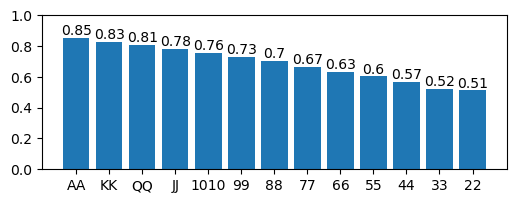

In [222]:
analysisPair(processedTHHandScoreDF)

In [235]:
def analysisSuited(df):
    df_nonPair = df[df["is_pair"] == False]
    df_nonPair_suited = df_nonPair[df["is_suited"] == True]
    df_nonPair_non_suited = df_nonPair[df_nonPair["is_suited"] == False]
    suited_winRate = np.mean(df_nonPair_suited["winRate"])
    non_suited_winRate = np.mean(df_nonPair_non_suited["winRate"])
    print(f"win-rate of suited hand: {suited_winRate}")
    print(f"win-rate of non-suited hand: {non_suited_winRate}")

In [236]:
analysisSuited(processedTHHandScoreDF)

win-rate of suited hand: 0.48269454006668655
win-rate of non-suited hand: 0.4542234548631474


C:\Users\User\AppData\Local\Temp\ipykernel_24412\3995165050.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nonPair_suited = df_nonPair[df["is_suited"] == True]


In [362]:
processedTHHandScoreDF.tail()

,hand,result,total,win,lose,winRate,is_pair,is_suited,valueOnly
1321,♦5♠2,"[1573, 419, 1036]",1573,419,1036,0.266370,False,False,52
1322,♣4♠3,"[1512, 401, 992]",1512,401,992,0.265212,False,False,43
1323,♦3♣2,"[1533, 405, 1005]",1533,405,1005,0.264188,False,False,32
1324,♠3♦2,"[1503, 396, 995]",1503,396,995,0.263473,False,False,32
1325,♣4♥2,"[1584, 405, 1059]",1584,405,1059,0.255682,False,False,42


In [267]:
PLOHandScoreDF = createDF(PLOHandScore)
PLOHandScoreDF

,hand,result,total,win,lose,winRate
0,♠A♣A♣J♣10,"[91, 75, 12]",91,75,12,0.824176
1,♠A♥A♥6♦5,"[123, 101, 19]",123,101,19,0.821138
2,♠K♦K♠4♦4,"[95, 78, 16]",95,78,16,0.821053
3,♠A♥A♠K♣10,"[98, 80, 18]",98,80,18,0.816327
4,♥A♦A♥7♣7,"[128, 104, 22]",128,104,22,0.812500
...,...,...,...,...,...,...
270720,♥4♣4♦4♠2,"[106, 18, 88]",106,18,88,0.169811
270721,♣5♠2♥2♦2,"[91, 15, 75]",91,15,75,0.164835
270722,♠4♥4♣4♦4,"[120, 16, 102]",120,16,102,0.133333
270723,♠3♥3♣3♦3,"[96, 9, 87]",96,9,87,0.093750


In [307]:
def processDFOmaha(df):
    def checkPair(hand):
        values = re.split("♠|♥|♣|♦", hand)[1:]
        if values[0] == values[1] == values[2] == values[3]:
            return "Four of a kind"
        elif (values[0] == values[1] == values[2]) or (values[1] == values[2] == values[3]):
            return "Three of a kind"
        elif (values[0] == values[1]) and (values[2] == values[3]):
            return "Two pairs"
        elif (values[0] == values[1]) or (values[1] == values[2]) or (values[2] == values[3]):
            return "One pair"
        else:
            return "No Pair"

    def checkSuit(hand):
        suits = re.split("2|3|4|5|6|7|8|9|10|J|Q|K|A", hand)[:-1]
        suitsIndex = sorted([list(suitLogo.values()).index(suit) for suit in suits])
        if suitsIndex[0] == suitsIndex[1] == suitsIndex[2] == suitsIndex[3]:
            return "Same suit"
        elif (suitsIndex[0] == suitsIndex[1] == suitsIndex[2]) or (suitsIndex[1] == suitsIndex[2] == suitsIndex[3]):
            return "Triple suited"
        elif (suitsIndex[0] == suitsIndex[1]) and (suitsIndex[2] == suitsIndex[3]):
            return "Double suited"
        elif (suitsIndex[0] == suitsIndex[1]) or (suitsIndex[1] == suitsIndex[2]) or (suitsIndex[2] == suitsIndex[3]):
            return "Two suited cards"
        else:
            return "Different suit"

    df["is_pair"] = df["hand"].apply(checkPair)
    df["is_suited"] = df["hand"].apply(checkSuit)
    
    return df

In [308]:
processedPLOHandScoreDF = processDFOmaha(PLOHandScoreDF)
processedPLOHandScoreDF

,hand,result,total,win,lose,winRate,is_pair,is_suited
0,♠A♣A♣J♣10,"[91, 75, 12]",91,75,12,0.824176,One pair,Triple suited
1,♠A♥A♥6♦5,"[123, 101, 19]",123,101,19,0.821138,One pair,Two suited cards
2,♠K♦K♠4♦4,"[95, 78, 16]",95,78,16,0.821053,Two pairs,Double suited
3,♠A♥A♠K♣10,"[98, 80, 18]",98,80,18,0.816327,One pair,Two suited cards
4,♥A♦A♥7♣7,"[128, 104, 22]",128,104,22,0.812500,Two pairs,Two suited cards
...,...,...,...,...,...,...,...,...
270720,♥4♣4♦4♠2,"[106, 18, 88]",106,18,88,0.169811,Three of a kind,Different suit
270721,♣5♠2♥2♦2,"[91, 15, 75]",91,15,75,0.164835,Three of a kind,Different suit
270722,♠4♥4♣4♦4,"[120, 16, 102]",120,16,102,0.133333,Four of a kind,Different suit
270723,♠3♥3♣3♦3,"[96, 9, 87]",96,9,87,0.093750,Four of a kind,Different suit


In [312]:
np.round(
    pd.pivot_table(
        processedPLOHandScoreDF, 
        values='winRate', 
        index='is_pair', 
        columns='is_suited', 
        aggfunc=np.mean,
        margins=True,
        margins_name="Overall"
    ),
    2)

is_suited,Different suit,Double suited,Same suit,Triple suited,Two suited cards,Overall
is_pair,,,,,,
Four of a kind,0.29,NaN,NaN,NaN,NaN,0.29
No Pair,0.43,0.50,0.45,0.46,0.47,0.47
One pair,0.50,0.57,NaN,0.53,0.53,0.53
Three of a kind,0.40,NaN,NaN,NaN,0.44,0.43
Two pairs,0.56,0.63,NaN,NaN,0.59,0.59
Overall,0.46,0.52,0.45,0.48,0.49,0.49


In [322]:
np.round(
    pd.pivot_table(
        processedPLOHandScoreDF.head(10000), 
        values='winRate', 
        index='is_pair', 
        columns='is_suited', 
        aggfunc='count',
        margins=True,
        margins_name="Overall"
    ),
    2)

is_suited,Different suit,Double suited,Same suit,Triple suited,Two suited cards,Overall
is_pair,,,,,,
No Pair,2.0,261.0,1.0,41.0,197.0,502
One pair,481.0,1936.0,NaN,983.0,5267.0,8667
Three of a kind,3.0,NaN,NaN,NaN,42.0,45
Two pairs,74.0,184.0,NaN,NaN,528.0,786
Overall,560.0,2381.0,1.0,1024.0,6034.0,10000


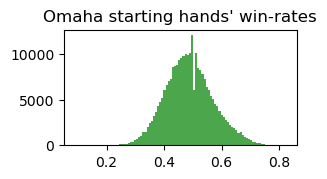

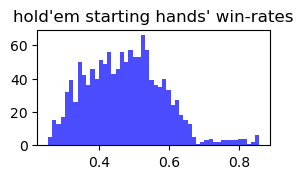

In [360]:
PLOVar = np.array(processedPLOHandScoreDF["winRate"])
THVar = np.array(processedTHHandScoreDF["winRate"])

plt.figure(figsize=(3,1.5))
plt.hist(PLOVar, 100, color="green", alpha=0.7)
plt.title("Omaha starting hands' win-rates")
plt.show()
plt.figure(figsize=(3,1.5))
plt.hist(THVar, 50, color="blue", alpha=0.7)
plt.title("hold'em starting hands' win-rates")
plt.show()